# <span style="color:Royalblue"><center> Curso de Regresión lineal con Python y scikit-learn </center></span>

## <span style="color:blue"><center> Análisis de Datos de Housing del [repositorio](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) de la UCL housing.data </center></span>


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
os.getcwd()

'C:\\Users\\Mateo\\Documents\\Programacion\\Platzi\\Data_Scientist\\Regresiones\\Lineal\\Datos'

In [11]:
df = pd.read_csv('housing.data',header=None, sep='\s+')
df.columns = df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                           'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
cols = ['DIS','INDUS','CRIM','RM','MEDV']
sns.set(style='whitegrid',context='notebook')

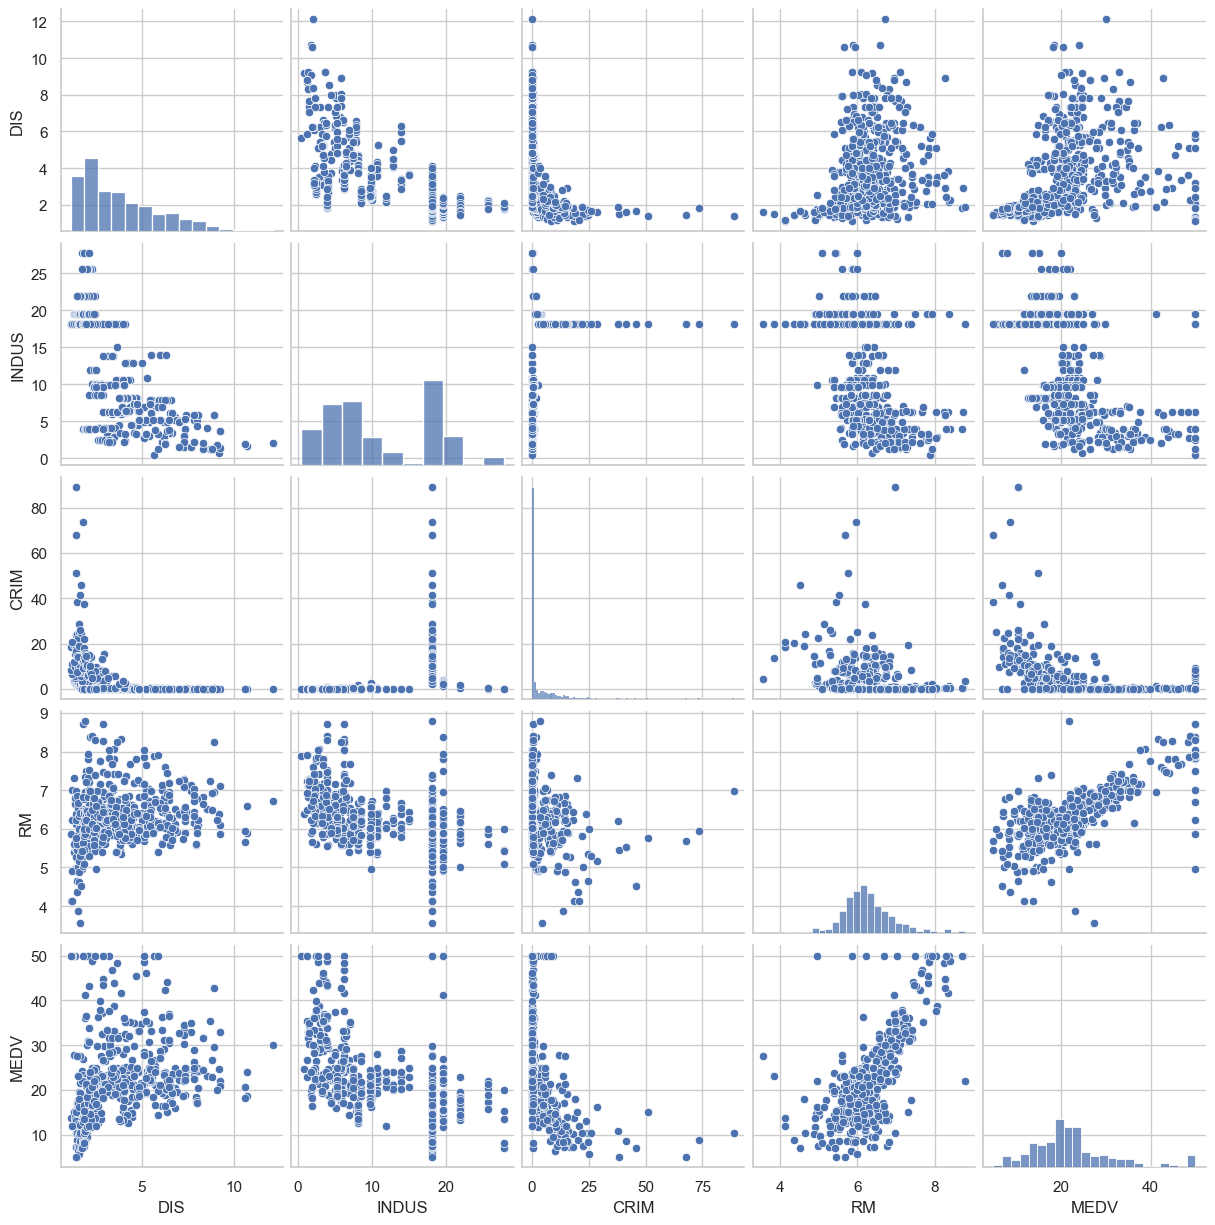

In [17]:
sns.pairplot(data=df[cols],height=2.5)

### Heatmap

<AxesSubplot: >

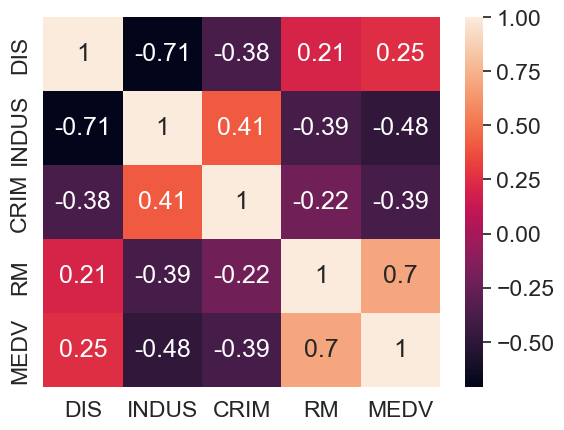

In [26]:
cm = np.corrcoef(df[cols].values.T) #Como tiene que ser una matriz es importante darle sólo valores
#Se puede lograr eso sacando sólo los valores y haciendo una Transpose o sólo con la Transpose
sns.set(font_scale=1.5)
sns.heatmap(cm,cbar=True, annot = True, 
           yticklabels=cols,xticklabels=cols)

### Modelamiento

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [29]:
x = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

# Estandarización
sc_x = StandardScaler()
sc_y = StandardScaler()
#--
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

#Modelo
slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

#### Análisis de los resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

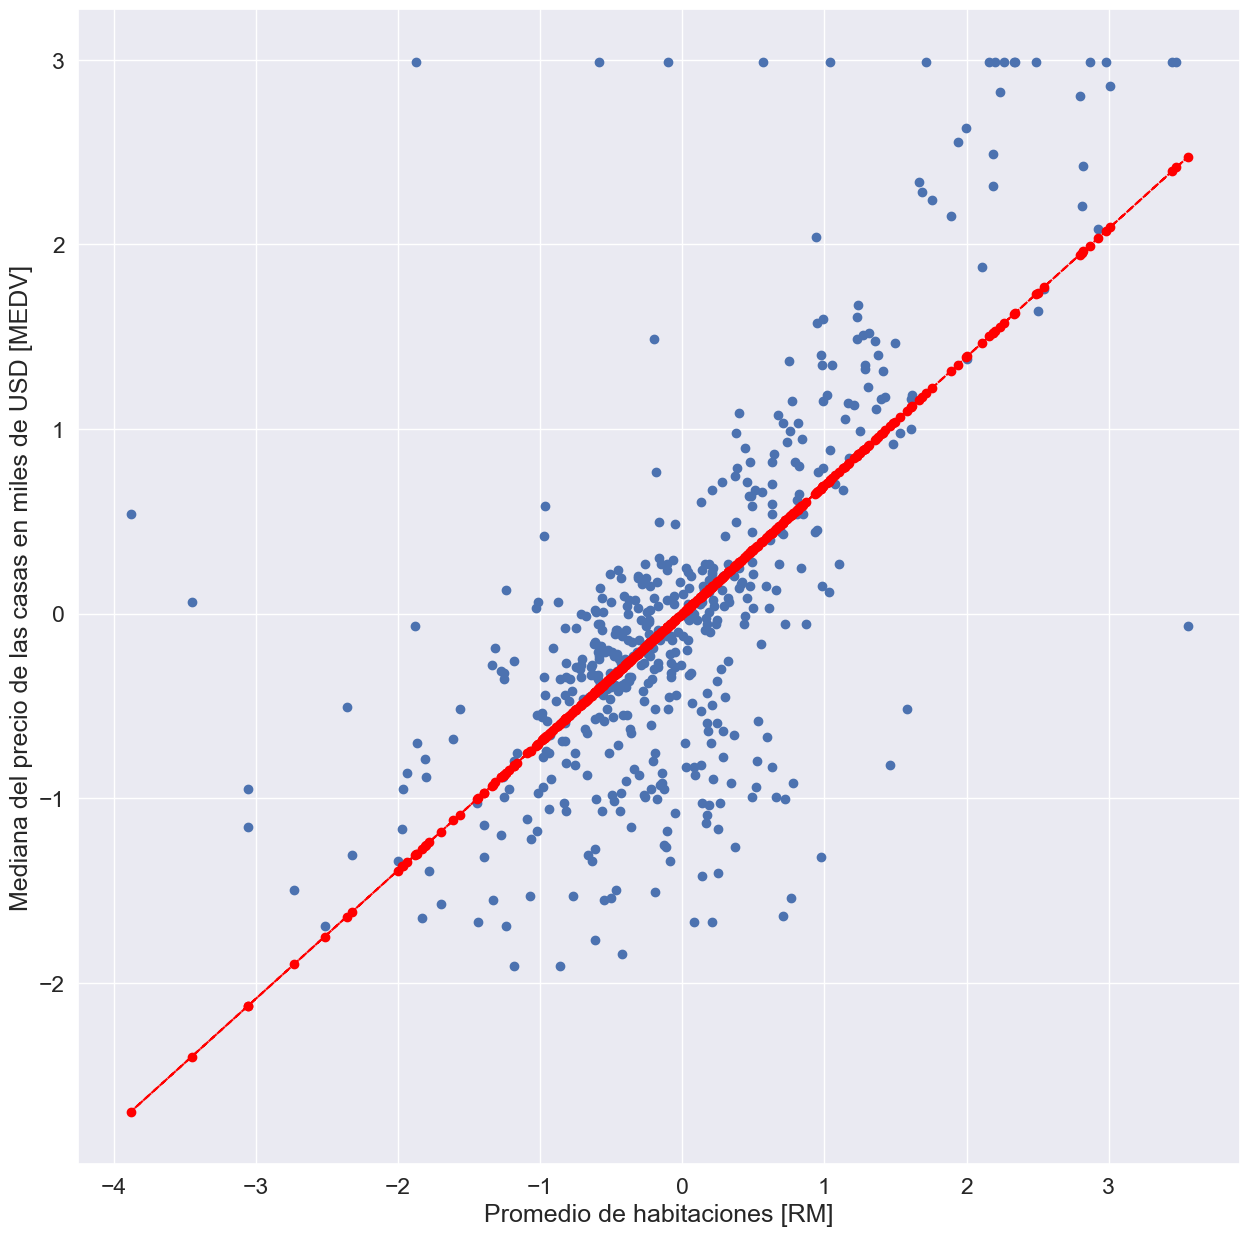

In [39]:
plt.figure(figsize=(15,15))
plt.scatter(x_std,y_std)
plt.plot(x_std,slr.predict(x_std),color='red',marker='o',linestyle='--')
plt.ylabel('Mediana del precio de las casas en miles de USD [MEDV]')
plt.xlabel('Promedio de habitaciones [RM]')

#### Generando la predicción del modelo

* ¿Cuando costará en promedio una casa con 5 habitaciones?

In [41]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print('El precio de una casa con 5 habitaciones en Boston es de ',
     sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

El precio de una casa con 5 habitaciones en Boston es de  [[10.83992413]]
